In [1]:
import torch
print(torch.__version__)

2.1.1+cu118


In [2]:
from detectron2.utils.logger import setup_logger
setup_logger()

<Logger detectron2 (DEBUG)>

In [3]:
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode
from detectron2.config import get_cfg
from detectron2 import model_zoo

In [4]:
import random
import cv2
import matplotlib.pyplot as plt
import os
import pickle
import json
from tqdm import tqdm

In [5]:
model_dir = f"../road_broken_model/final_model"
num_classes = 16

test_dataset_name = "1027_Test_road_damage"
test_images_path = "./one_images" # test img pwd
test_json_annot_path = "./annotations/real_sunny_AM_20220614_112456_sedan_Dong-gu_00026.json" # test json pwd

# Save configuration file
cfg_save_path = f"../road_broken_model/final_model/running_final.pickle"

In [6]:
register_coco_instances(name = test_dataset_name, metadata = {}, json_file = test_json_annot_path, image_root = test_images_path)

In [7]:
# Predictor 생성 VAL or TEST
# 학습된 모델을 바탕으로 예측값을 생성합니다.
from detectron2.engine import DefaultPredictor
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

with open(cfg_save_path, 'rb') as f:
    cfg = pickle.load(f)

cfg.MODEL.DEVICE='cuda:0'
cfg.MODEL.WEIGHTS = os.path.join(f"{model_dir}/model_final.pth")
# 한계점 지정 기본값 0.5
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
predictor = DefaultPredictor(cfg)

# Test AP 값 확인
evaluator = COCOEvaluator(test_dataset_name, cfg, False, output_dir="./output")
val_loader = build_detection_test_loader(cfg, test_dataset_name)
inference_on_dataset(predictor.model, val_loader, evaluator)

[03/18 22:53:27 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ../road_broken_model/final_model/model_final.pth ...
WARNING [03/18 22:53:27 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[03/18 22:53:27 d2.data.datasets.coco]: Loaded 1 images in COCO format from ./annotations/real_sunny_AM_20220614_112456_sedan_Dong-gu_00026.json
[03/18 22:53:27 d2.data.build]: Distribution of instances among all 16 categories:
|    category     | #instances   |   category    | #instances   |    category     | #instances   |
|:---------------:|:-------------|:-------------:|:-------------|:---------------:|:-------------|
|   PE드럼 정상   | 0            |  PE드럼 파손  | 0            |  PE방호벽 정상  | 0            |
|  PE방호벽 파손  | 0            | PE안내봉 정상 | 0            |  PE안내봉 파손  | 0            |
|   라바콘 정상   | 0            |  라바콘 파손  | 0            | 시선유도봉 정상 | 4            |
| 시선유도봉 파

/shared/home/sw_innov03/anaconda3/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[03/18 22:53:28 d2.evaluation.evaluator]: Inference done 1/1. Dataloading: 0.0000 s/iter. Inference: 0.8423 s/iter. Eval: 0.0316 s/iter. Total: 0.8739 s/iter. ETA=0:00:00
[03/18 22:53:28 d2.evaluation.evaluator]: Total inference time: 0:00:00.893817 (0.893817 s / iter per device, on 1 devices)
[03/18 22:53:28 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:00 (0.842315 s / iter per device, on 1 devices)
[03/18 22:53:29 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[03/18 22:53:29 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[03/18 22:53:29 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[03/18 22:53:29 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[03/18 22:53:29 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.00 seconds.
[03/18 22:53:29 d2.evaluation.fa

OrderedDict([('bbox',
              {'AP': 44.74009900990099,
               'AP50': 50.0,
               'AP75': 50.0,
               'APs': nan,
               'APm': 95.04950495049505,
               'APl': 41.26237623762376,
               'AP-PE드럼 정상': nan,
               'AP-PE드럼 파손': nan,
               'AP-PE방호벽 정상': nan,
               'AP-PE방호벽 파손': nan,
               'AP-PE안내봉 정상': nan,
               'AP-PE안내봉 파손': nan,
               'AP-라바콘 정상': nan,
               'AP-라바콘 파손': nan,
               'AP-시선유도봉 정상': 89.48019801980197,
               'AP-시선유도봉 파손': nan,
               'AP-제설함 정상': nan,
               'AP-제설함 파손': 0.0,
               'AP-PE입간판 정상': nan,
               'AP-PE입간판 파손': nan,
               'AP-PE휀스 정상': nan,
               'AP-PE휀스 파손': nan}),
             ('segm',
              {'AP': 43.76237623762376,
               'AP50': 50.0,
               'AP75': 50.0,
               'APs': nan,
               'APm': 90.0,
               'APl': 42.5247524

In [8]:
test_folder = "images"

In [9]:
img_num = 3 # 시각화할 이미지 개수

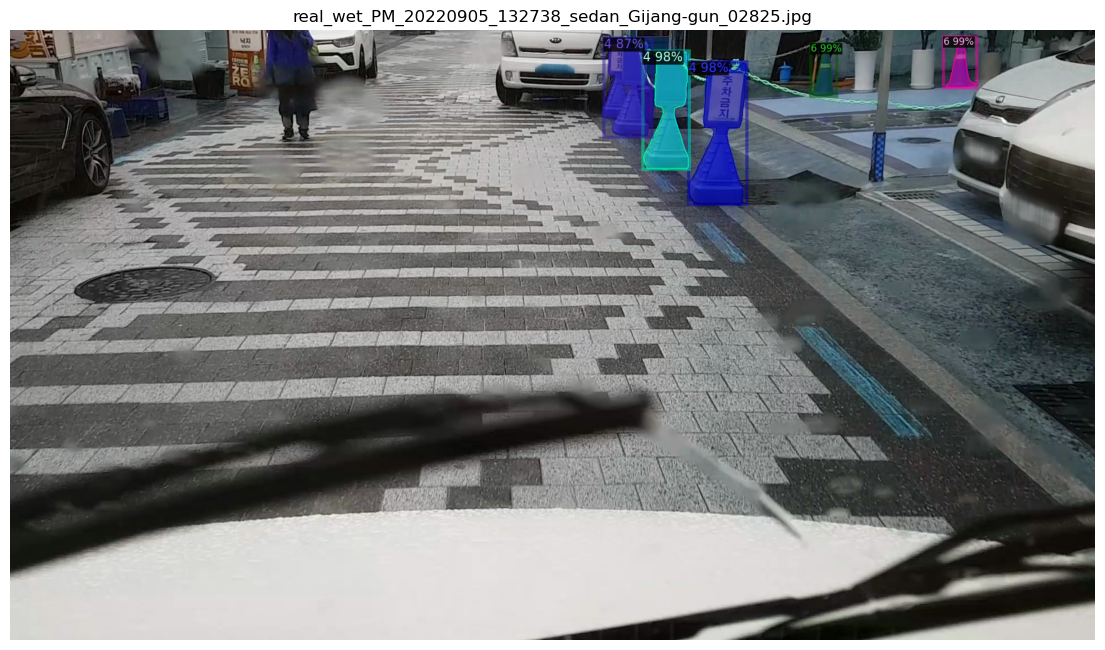

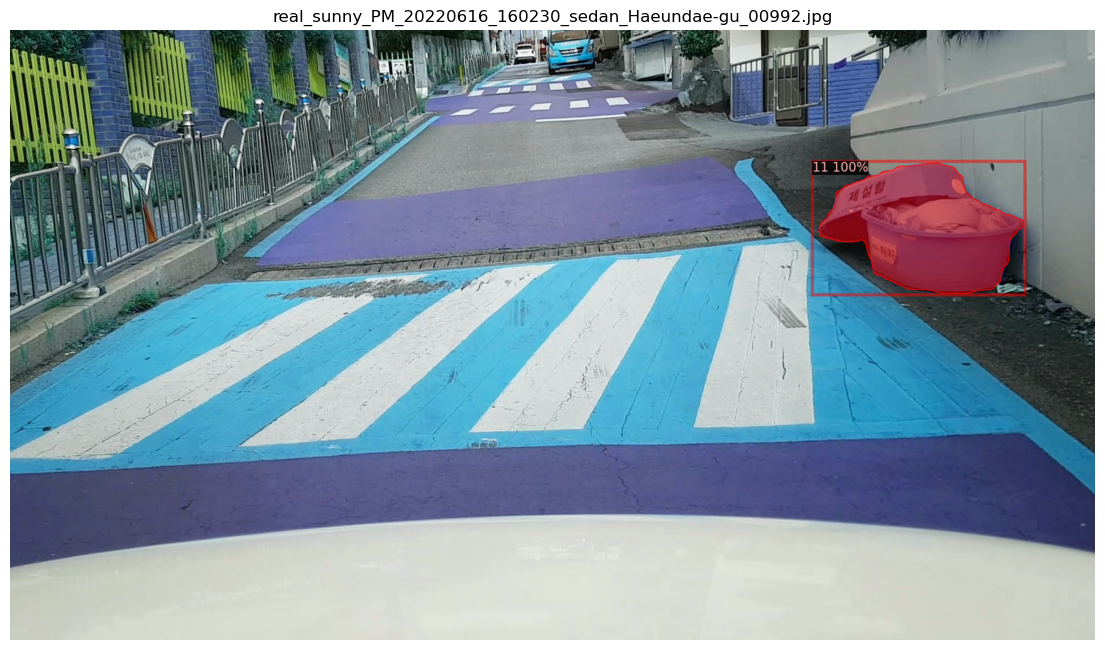

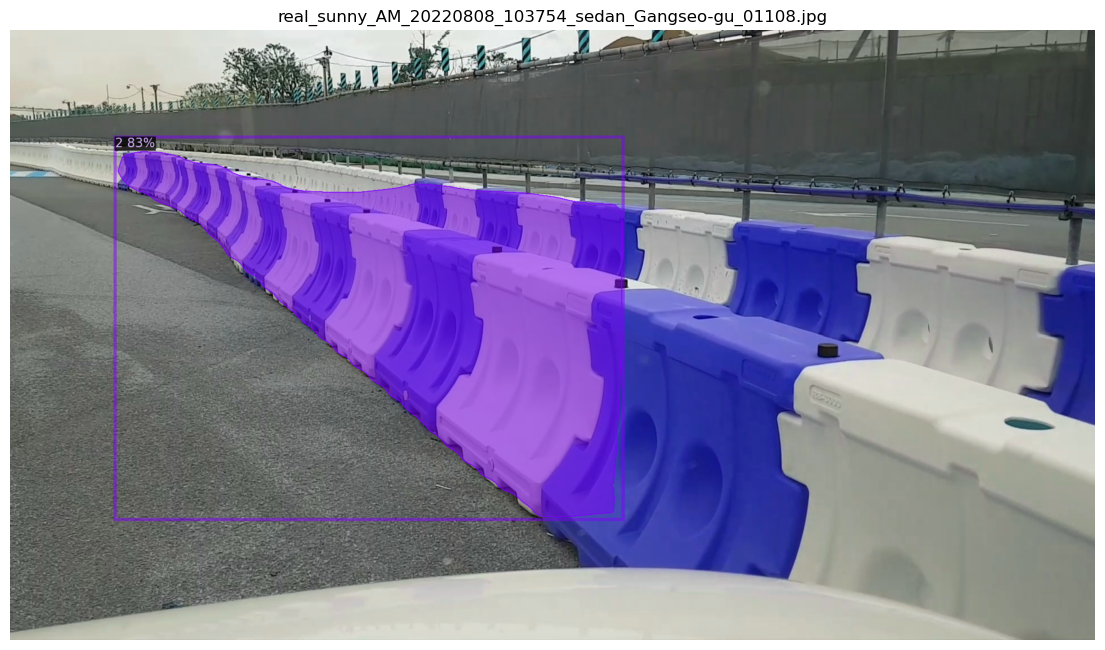

In [10]:
for img_file in os.listdir(test_folder)[:img_num]:
    if img_file.lower().endswith((".png", ".jpg", ".jpeg")):  # 이미지 파일 확인
        img_path = os.path.join(test_folder, img_file)
        img = cv2.imread(img_path)
        
        # 이미지에 대해 추론 수행
        outputs = predictor(img)
        
        # 추론 결과 시각화
        v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.0)
        v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
        plt.figure(figsize=(14, 10))
        plt.imshow(v.get_image()[:, :, ::-1])
        plt.axis('off')
        plt.title(img_file)
        plt.show()

In [11]:
labels_to_names_seq =  {0:'PE드럼 정상', 1:'PE드럼 파손', 2:'PE방호벽 정상', 3:'PE방호벽 파손', 4:'PE안내봉 정상', 5:'PE안내봉 파손', 6:'라바콘 정상',
               7:'라바콘 파손', 8:'시선유도봉 정상', 9:'시선유도봉 파손', 10:'제설함 정상', 11:'제설함 파손', 12:'PE입간판 정상',
               13:'PE입간판 파손', 14:'PE휀스 정상', 15:'PE휀스 파손'}

# 한글 라벨링하고 싶었는데 폰트 깨짐.. 로컬에서 해야됨..

In [14]:
# Visualizer 이용안하고 직접 시각화 + inference 속도 측정하는 함수 (BBOX)
import time
import matplotlib.patches as patches

def visualize_inference(img_path, predictor):
    img = cv2.imread(img_path)

    start_time = time.time()

    outputs = predictor(img)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Inference time for {img_path}: {elapsed_time:.2f} seconds")

    # 추론 결과 시각화
    plt.figure(figsize=(14, 10))
    ax = plt.gca()
    ax.imshow(img[:, :, ::-1])
    plt.axis('off')
    plt.title(img_path.split('/')[-1])

    instances = outputs["instances"].to("cpu")
    boxes = instances.pred_boxes.tensor.numpy()
    scores = instances.scores.numpy()
    classes = instances.pred_classes.numpy()
    for box, score, cls in zip(boxes, scores, classes):
        x1, y1, x2, y2 = box
        label = labels_to_names_seq[cls]
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x1, y1, f"{cls} {score:.2f}", fontsize=10, color='white', backgroundcolor="red")
        # ax.text(x1, y1, f"{label} {score:.2f}", fontsize=10, color='white', backgroundcolor="red", fontproperties=font_prop)
    plt.show()

Inference time for images/real_wet_PM_20220905_132738_sedan_Gijang-gun_02825.jpg: 0.13 seconds


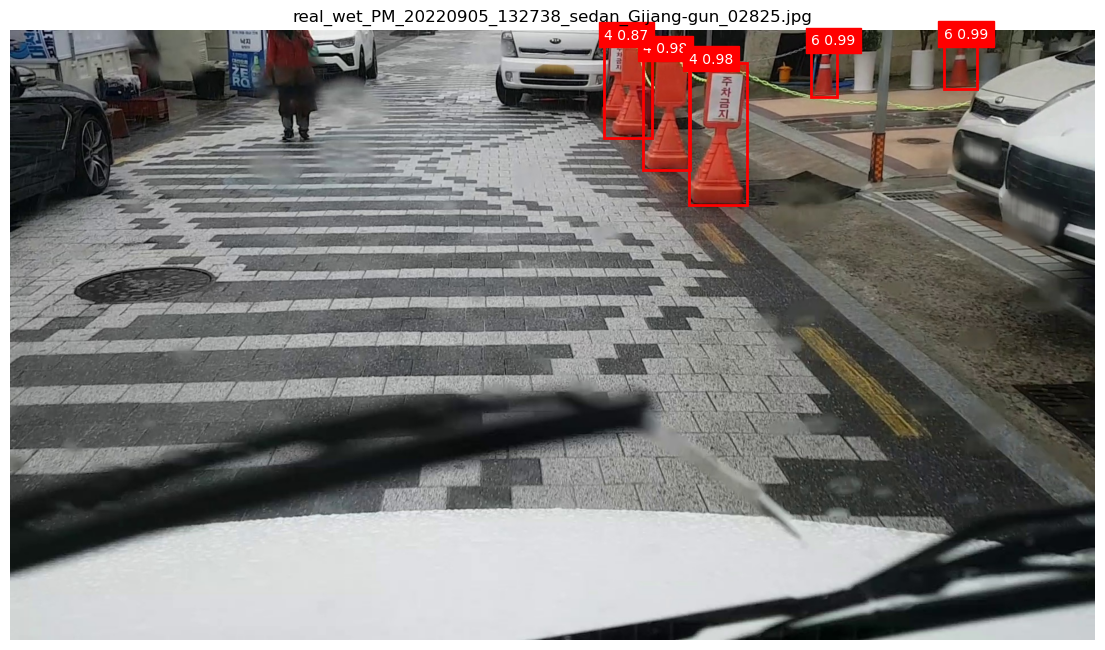

Inference time for images/real_sunny_PM_20220616_160230_sedan_Haeundae-gu_00992.jpg: 0.13 seconds


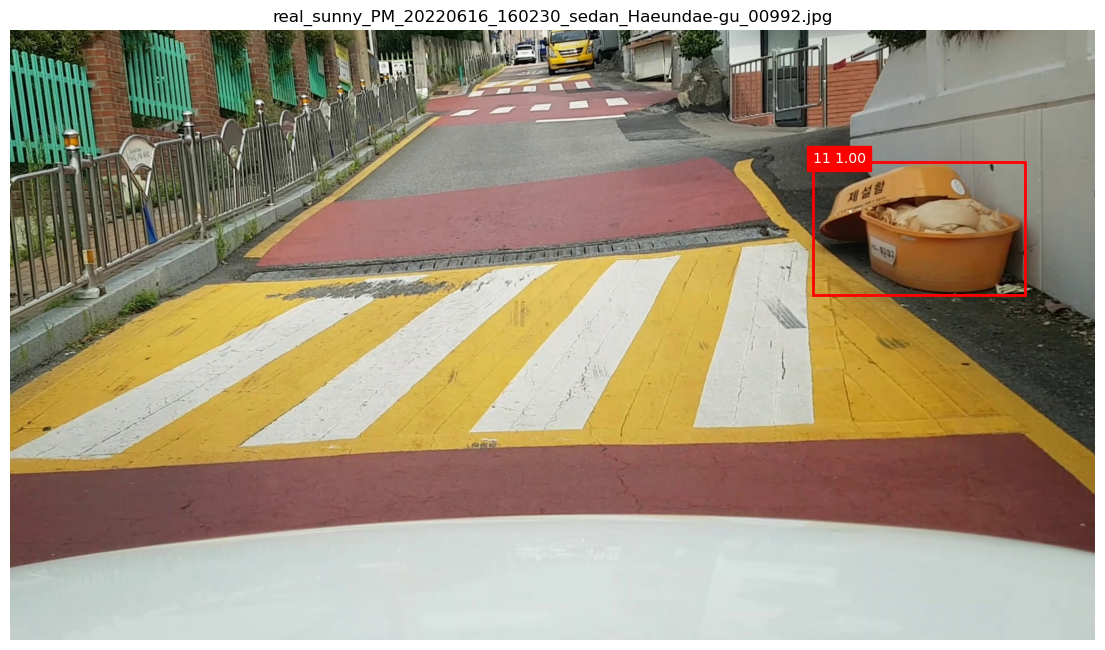

Inference time for images/real_sunny_AM_20220808_103754_sedan_Gangseo-gu_01108.jpg: 0.13 seconds


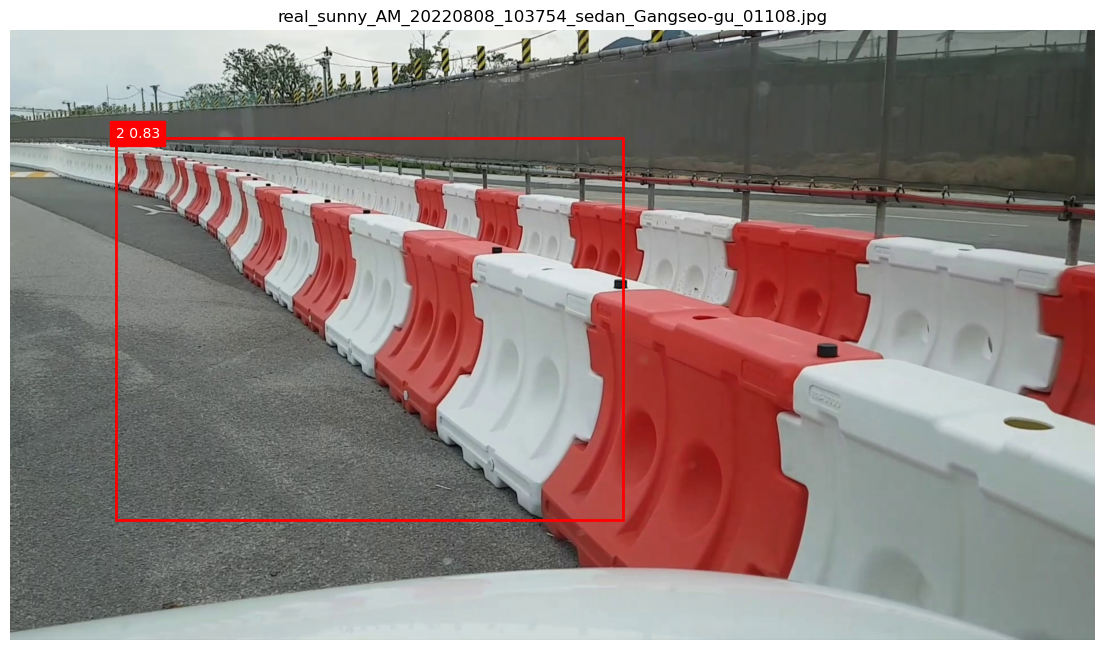

In [15]:
for img_file in os.listdir(test_folder)[:img_num]:
    if img_file.lower().endswith((".png", ".jpg", ".jpeg")):  # 이미지 파일 확인
        img_path = os.path.join(test_folder, img_file)
        
        # 시각화 함수 호출
        visualize_inference(img_path, predictor)